C:\Users\tonhanhgia\AppData\Local\Temp\ipykernel_3860\1629996269.py:27: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(LEADS_CSV, parse_dates=["CreatedAt"], infer_datetime_format=True)


=== KPI LEADS ===
total_leads: 8000
leadscore_mean: 21.49
cr_mean_%: 12.16
n_source_detail: 7
n_assigned: 8


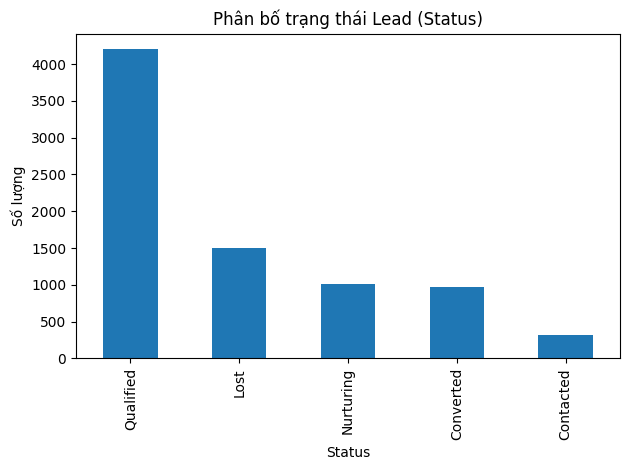

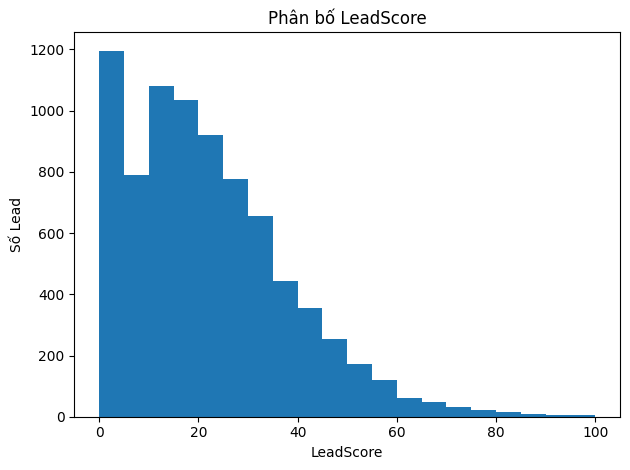

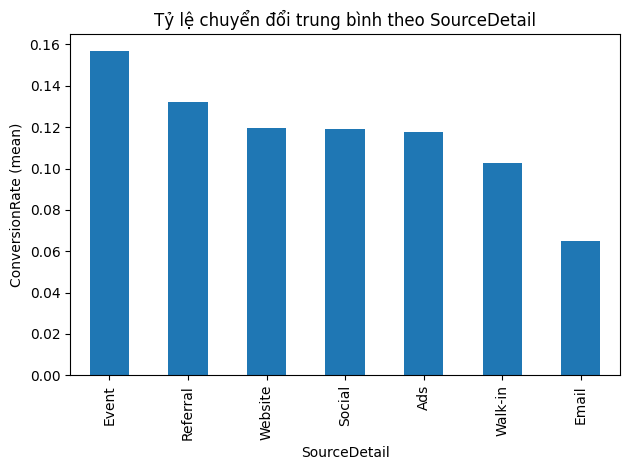

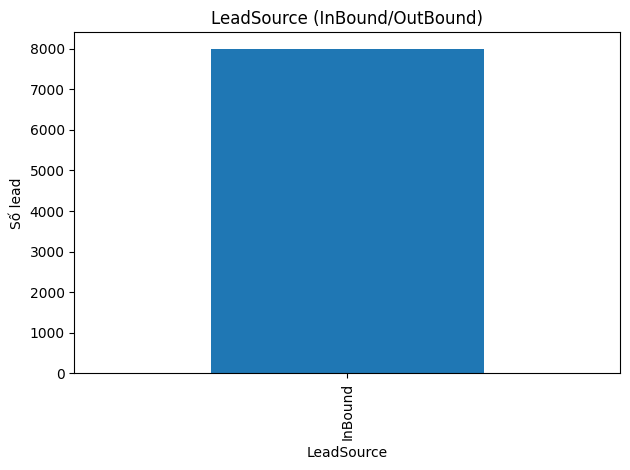

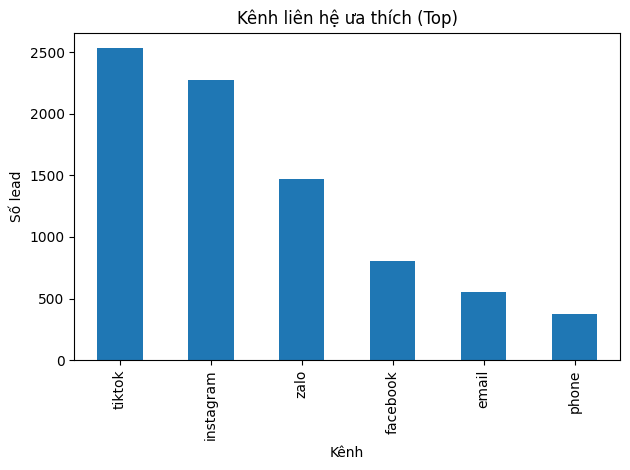

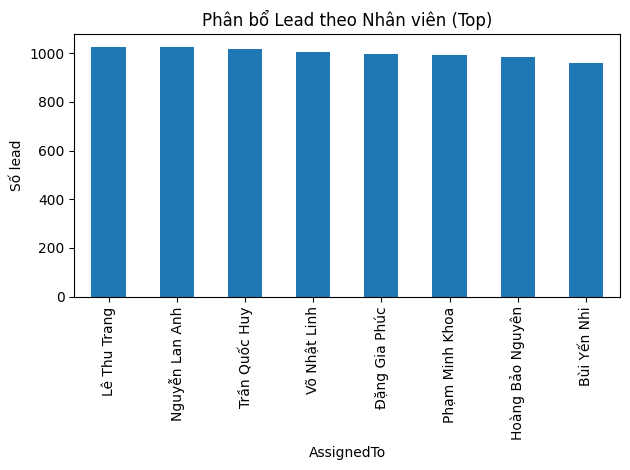

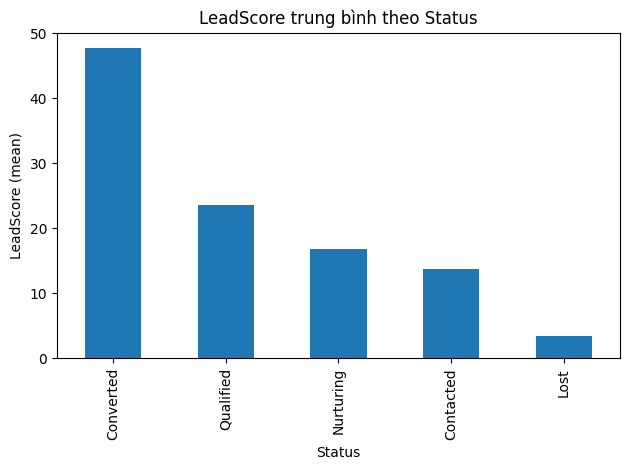

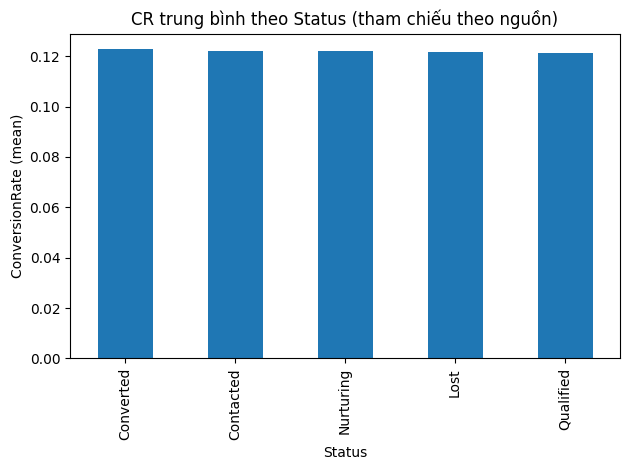

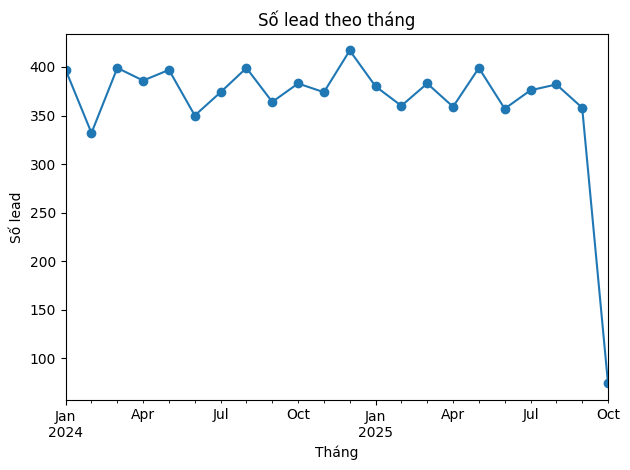

In [1]:
# viz_leads.py
# Yêu cầu: Python 3.9+, pip install pandas matplotlib
# Chạy: python viz_leads.py

import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# === Cấu hình ===
LEADS_CSV = "leads_dataset_v2025_full.csv"   # đổi đường dẫn nếu cần
SAVE_DIR = "leads_charts"                    # thư mục lưu ảnh (tùy chọn)
SAVE_IMAGES = True                           # đặt False nếu không muốn lưu ảnh

def ensure_dir(p):
    if SAVE_IMAGES:
        os.makedirs(p, exist_ok=True)

def savefig(name: str):
    if SAVE_IMAGES:
        plt.savefig(os.path.join(SAVE_DIR, name), dpi=150, bbox_inches="tight")

def main():
    ensure_dir(SAVE_DIR)

    # ---- Load ----
    df = pd.read_csv(LEADS_CSV, parse_dates=["CreatedAt"], infer_datetime_format=True)
    # ép kiểu số
    for col in ["LeadScore", "ConversionRate"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # ---- KPI ----
    kpis = {
        "total_leads": len(df),
        "leadscore_mean": round(df["LeadScore"].mean(skipna=True), 2),
        "cr_mean_%": round(df["ConversionRate"].mean(skipna=True)*100, 2),
        "n_source_detail": df["SourceDetail"].nunique(),
        "n_assigned": df["AssignedTo"].nunique(),
    }
    print("=== KPI LEADS ===")
    for k,v in kpis.items():
        print(f"{k}: {v}")

    # 1) Phân bố Status
    plt.figure()
    df["Status"].value_counts().sort_values(ascending=False).plot(kind="bar")
    plt.title("Phân bố trạng thái Lead (Status)")
    plt.xlabel("Status"); plt.ylabel("Số lượng")
    plt.tight_layout(); savefig("01_status.png"); plt.show()

    # 2) Histogram LeadScore
    plt.figure()
    df["LeadScore"].dropna().plot(kind="hist", bins=20)
    plt.title("Phân bố LeadScore")
    plt.xlabel("LeadScore"); plt.ylabel("Số Lead")
    plt.tight_layout(); savefig("02_leadscore_hist.png"); plt.show()

    # 3) CR trung bình theo SourceDetail
    plt.figure()
    df.groupby("SourceDetail")["ConversionRate"].mean().sort_values(ascending=False).plot(kind="bar")
    plt.title("Tỷ lệ chuyển đổi trung bình theo SourceDetail")
    plt.xlabel("SourceDetail"); plt.ylabel("ConversionRate (mean)")
    plt.tight_layout(); savefig("03_cr_by_source.png"); plt.show()

    # 4) LeadSource (InBound/OutBound)
    plt.figure()
    df["LeadSource"].value_counts().plot(kind="bar")
    plt.title("LeadSource (InBound/OutBound)")
    plt.xlabel("LeadSource"); plt.ylabel("Số lead")
    plt.tight_layout(); savefig("04_leadsource.png"); plt.show()

    # 5) Kênh liên hệ ưa thích (Top)
    if "PreferredContactChannel" in df.columns:
        plt.figure()
        df["PreferredContactChannel"].value_counts(dropna=True).head(12).plot(kind="bar")
        plt.title("Kênh liên hệ ưa thích (Top)")
        plt.xlabel("Kênh"); plt.ylabel("Số lead")
        plt.tight_layout(); savefig("05_preferred_channel.png"); plt.show()

    # 6) AssignedTo (Top)
    plt.figure()
    df["AssignedTo"].value_counts().head(12).plot(kind="bar")
    plt.title("Phân bổ Lead theo Nhân viên (Top)")
    plt.xlabel("AssignedTo"); plt.ylabel("Số lead")
    plt.tight_layout(); savefig("06_assigned_top.png"); plt.show()

    # 7) LeadScore trung bình theo Status
    plt.figure()
    df.groupby("Status")["LeadScore"].mean().sort_values(ascending=False).plot(kind="bar")
    plt.title("LeadScore trung bình theo Status")
    plt.xlabel("Status"); plt.ylabel("LeadScore (mean)")
    plt.tight_layout(); savefig("07_score_by_status.png"); plt.show()

    # 8) CR trung bình theo Status (tham chiếu theo nguồn)
    plt.figure()
    df.groupby("Status")["ConversionRate"].mean().sort_values(ascending=False).plot(kind="bar")
    plt.title("CR trung bình theo Status (tham chiếu theo nguồn)")
    plt.xlabel("Status"); plt.ylabel("ConversionRate (mean)")
    plt.tight_layout(); savefig("08_cr_by_status.png"); plt.show()

    # 9) Số lead theo tháng tạo
    if "CreatedAt" in df.columns:
        plt.figure()
        month = df["CreatedAt"].dt.to_period("M").dt.to_timestamp()
        month_counts = month.value_counts().sort_index()
        month_counts.plot(kind="line", marker="o")
        plt.title("Số lead theo tháng")
        plt.xlabel("Tháng"); plt.ylabel("Số lead")
        plt.tight_layout(); savefig("09_leads_by_month.png"); plt.show()

if __name__ == "__main__":
    main()
